<a href="https://colab.research.google.com/github/VrajeshPatel20/Covid_Vaccination_Progress-Data-Analysis/blob/main/Covid-19_Vaccination_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('course-project')
jovian.set_colab_id('1uXyCcj2iB78GKbgHIZI-lDwjVsGemhMI')

# Covid-19 Analyzing Vaccination progress WorldWide

The dataset used for analysis was retreieved from kaggle, we are here trying to find the progress of vaccine distrubution worldwide and the companies reponsible for the same. Here, we have mainly used pandas library and with the help of sets and lists we were able to clean the data and after retreiveing that we were sucessfully able to get graphical visualization of the data. I gained maximum knowledge about data analysis and the functions of pandas and matplotlib library from the course avaialbe at jovian.ai [Data Analysis with Python: Zero to Pandas](zerotopandas.com). 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

To add the dataset to your project use **opendataset** library for python. Copy the url and download the dataset by providing your username and API key for Kaggle.  

In [61]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [62]:
# Change this
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress' 

In [63]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vrajeshpatel0
Your Kaggle Key: ··········


100%|██████████| 71.2k/71.2k [00:00<00:00, 11.8MB/s]

The dataset has been downloaded and extracted.

In [64]:
# Change this
data_dir = './covid-world-vaccination-progress'

In [65]:
import os
os.listdir(data_dir)

['country_vaccinations.csv']

Let us save and upload our work to Jovian before continuing.

In [66]:
project_name = "course-project" # change this (use lowercase letters and hyphens only)

In [67]:
!pip install jovian --upgrade -q

In [68]:
import jovian

In [69]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project


'https://jovian.ai/vrajesh1/course-project'

## Data Preparation and Cleaning

The data was collected for government sources availabe online and some information may not be availabe for all the countries that may result in many NaN values which may reduce the accuracy of the analysis. We use isnull function of pandas library to remove the columns with more than 50% NaN values 



In [70]:
import pandas as pd

In [71]:
os.listdir(data_dir)


['country_vaccinations.csv']

In [72]:
covid_world = pd.read_csv('./covid-world-vaccination-progress/country_vaccinations.csv')

#**DataSet**
You can see the raw data retreived form the kaggle API below. It has not been cleaned or used yet. 

In [73]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


The description or the significant values for the data can be observed using .describe() fucntion of dataframe

In [74]:
covid_world.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.084000e+03,1.727000e+03,1.094000e+03,1.735000e+03,3.083000e+03,2084.000000,1727.000000,1094.000000,3083.000000
mean,1.360663e+06,1.139099e+06,3.309550e+05,7.211947e+04,5.619837e+04,5.492039,4.795900,1.515896,2174.875446
std,4.460924e+06,3.706714e+06,1.189176e+06,2.054734e+05,1.734959e+05,10.466306,8.037009,4.012435,3711.789296
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.707200e+04,2.535850e+04,6.948000e+03,1.888000e+03,1.282000e+03,0.517500,0.530000,0.100000,347.000000
50%,1.696115e+05,1.517370e+05,2.829800e+04,1.055900e+04,6.331000e+03,2.060000,2.160000,0.580000,969.000000
75%,7.041462e+05,6.045815e+05,1.618212e+05,5.370700e+04,2.998450e+04,4.800000,3.880000,1.210000,1822.000000
max,5.288436e+07,3.829227e+07,1.407744e+07,2.242472e+06,1.916190e+06,77.000000,47.160000,30.170000,30869.000000


Before clean we need to be sure there is something that may cause problems or miscalculations. If all the values provided below are null or zero we can skip this step.

In [75]:
covid_world.isnull().sum()

country                                   0
iso_code                                256
date                                      0
total_vaccinations                     1124
people_vaccinated                      1481
people_fully_vaccinated                2114
daily_vaccinations_raw                 1473
daily_vaccinations                      125
total_vaccinations_per_hundred         1124
people_vaccinated_per_hundred          1481
people_fully_vaccinated_per_hundred    2114
daily_vaccinations_per_million          125
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [76]:
def data_cleaner_basic(data):
  for i in data.columns:
    if data[i].isnull().sum() > (0.5 * data.shape[0]):
      data.drop(i,axis=1,inplace=True)


In [80]:
data_cleaner_basic(covid_world)

In [81]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,0.00,0.00,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,64.0,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,64.0,0.00,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,60.0,63.0,0.01,0.01,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,78.0,66.0,0.01,0.01,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,28786.0,28015.0,21.82,21.70,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,32062.0,27897.0,22.83,22.71,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,33715.0,27743.0,23.90,23.77,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,22555.0,26285.0,24.62,24.47,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [82]:
type(covid_world)

pandas.core.frame.DataFrame

As we can observe below the data has been cleaned as we removed all the columns with more than 50% NaN or Null values 

In [83]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,0.00,0.00,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,64.0,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,64.0,0.00,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,60.0,63.0,0.01,0.01,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,78.0,66.0,0.01,0.01,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,28786.0,28015.0,21.82,21.70,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,32062.0,27897.0,22.83,22.71,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,33715.0,27743.0,23.90,23.77,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,22555.0,26285.0,24.62,24.47,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [84]:
covid_world['country'] = covid_world.country

In [87]:
import jovian

In [88]:
jovian.commit('Analysis of Vaccination progress for Covid-19')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project


'https://jovian.ai/vrajesh1/course-project'

## Exploratory Analysis and Visualization

 We are going to observe some graphical representation of data we have analyzed later on here.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [89]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Q.**  Top 10 countries worldwide with best access to Covid-19 vaccination 

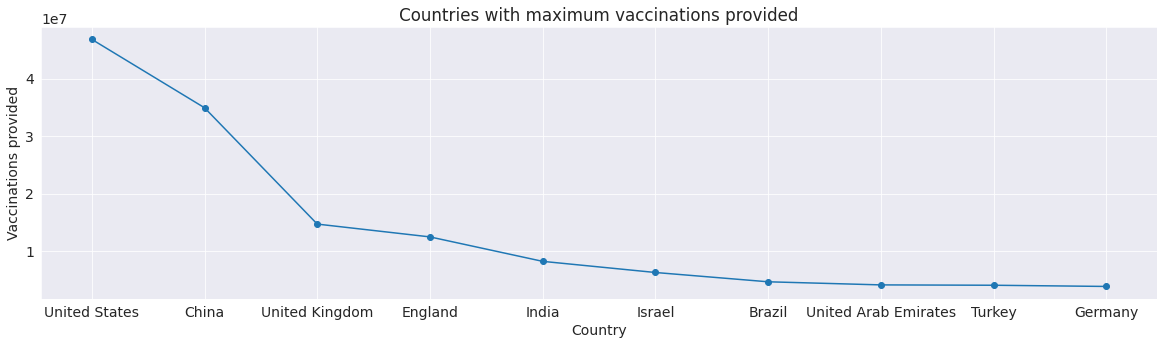

In [90]:
top_access_countries = covid_world.groupby(covid_world.index).daily_vaccinations.sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(20,5))
plt.xlabel('Country')
plt.ylabel('Vaccinations provided')
plt.title('Countries with maximum vaccinations provided')

plt.plot(top_access_countries,marker='o')

**Q.** The growth in number of vaccinations daily availabe for every country

In [91]:
import numpy as np 

def plot_variation(df,feature,title,countries):
  n=1000000
  data = []
  for country in countries:
    datafile = df.loc[df.country == country]
    trace = go.Scatter(
            x = datafile['date'],y = datafile[feature],
            name=country,
            mode = "markers+lines",
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=datafile['country'],)
    data.append(trace)
  fig = dict(data=data)
  iplot(fig, filename='all_countries')

In [92]:
names=covid_world['country'].unique().tolist()
plot_variation(covid_world, 'daily_vaccinations', 'Total vaccination percent evolution (selected countries, log scale)', names)

**Q.** Top 40 countries with highest mean vaccination per million

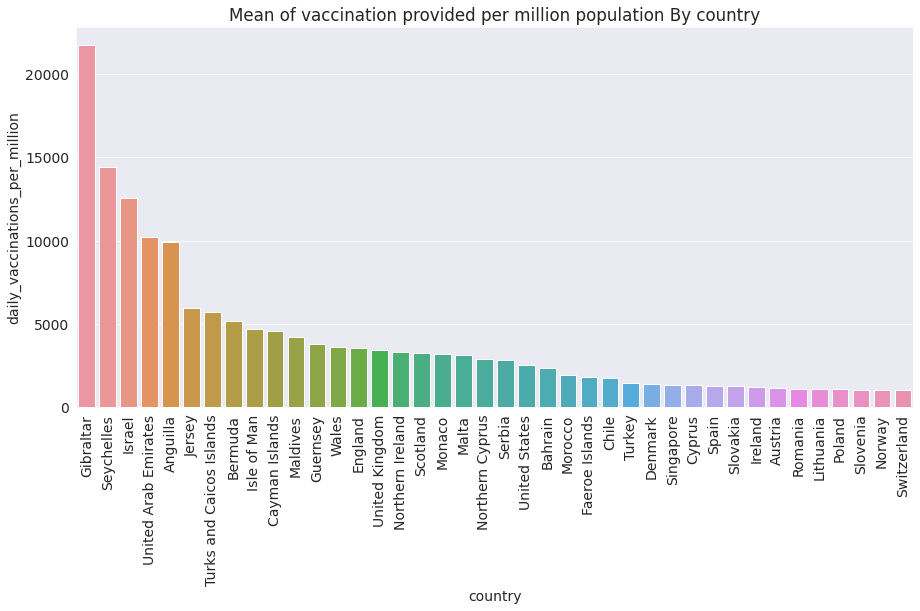

In [93]:
mean_vacc_per_mill = covid_world.groupby(covid_world.index).mean().sort_values(by='daily_vaccinations_per_million',ascending=False)
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Mean of vaccination provided per million population By country')
plt.xticks(rotation=90)
sns.barplot(x=mean_vacc_per_mill.head(40).index,y=mean_vacc_per_mill['daily_vaccinations_per_million'].head(40))

**Q.** The sum of all the vacinations availabe daily worldwide representing the top 20 days when maximum people were vaccinated.

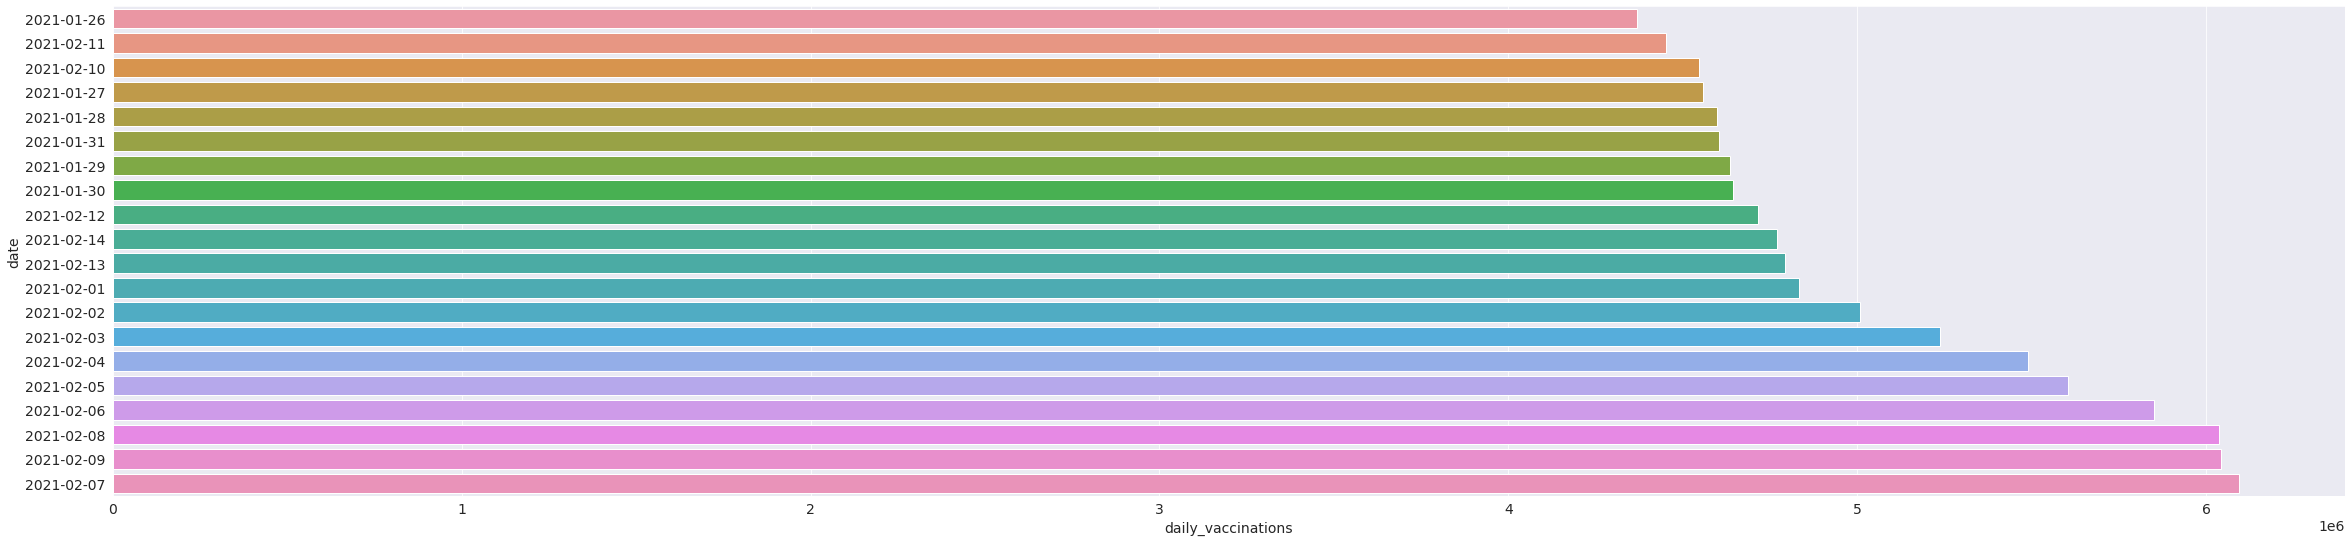

In [94]:
covid_inc = covid_world.groupby('date').daily_vaccinations.sum().sort_values()
doses_inc = covid_inc.tail(20)
plt.figure(figsize=(40,9))
sns.barplot(x=doses_inc,y=doses_inc.index)

**Q.** - The number of vaccinations provided by each compnay worldwide and the company serving maximum number of countries respectively 

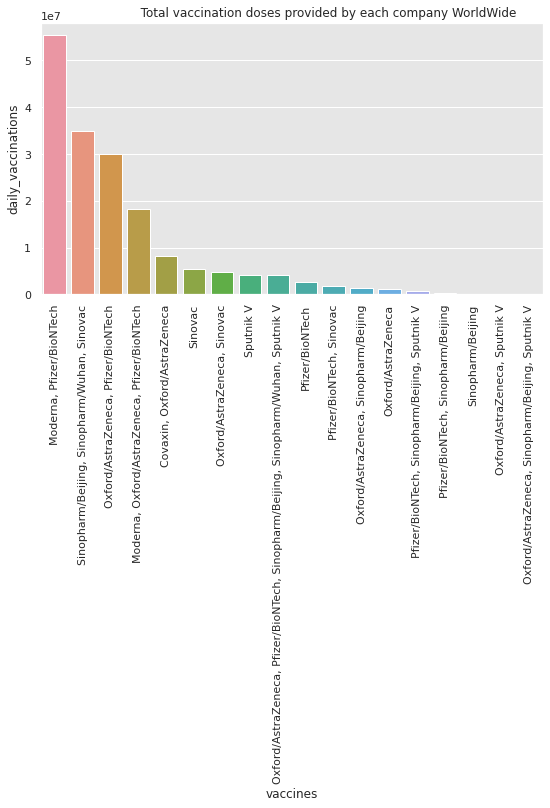

In [140]:
vaccines_per_company = covid_world.groupby('vaccines').sum()
vaccines_per_company_total = vaccines_per_company.sort_values(by='daily_vaccinations', ascending=False)
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.title('                   Total vaccination doses provided by each company WorldWide')
sns.barplot(x=vaccines_per_company_total.head(20).index,y=vaccines_per_company_total.head(20).daily_vaccinations)

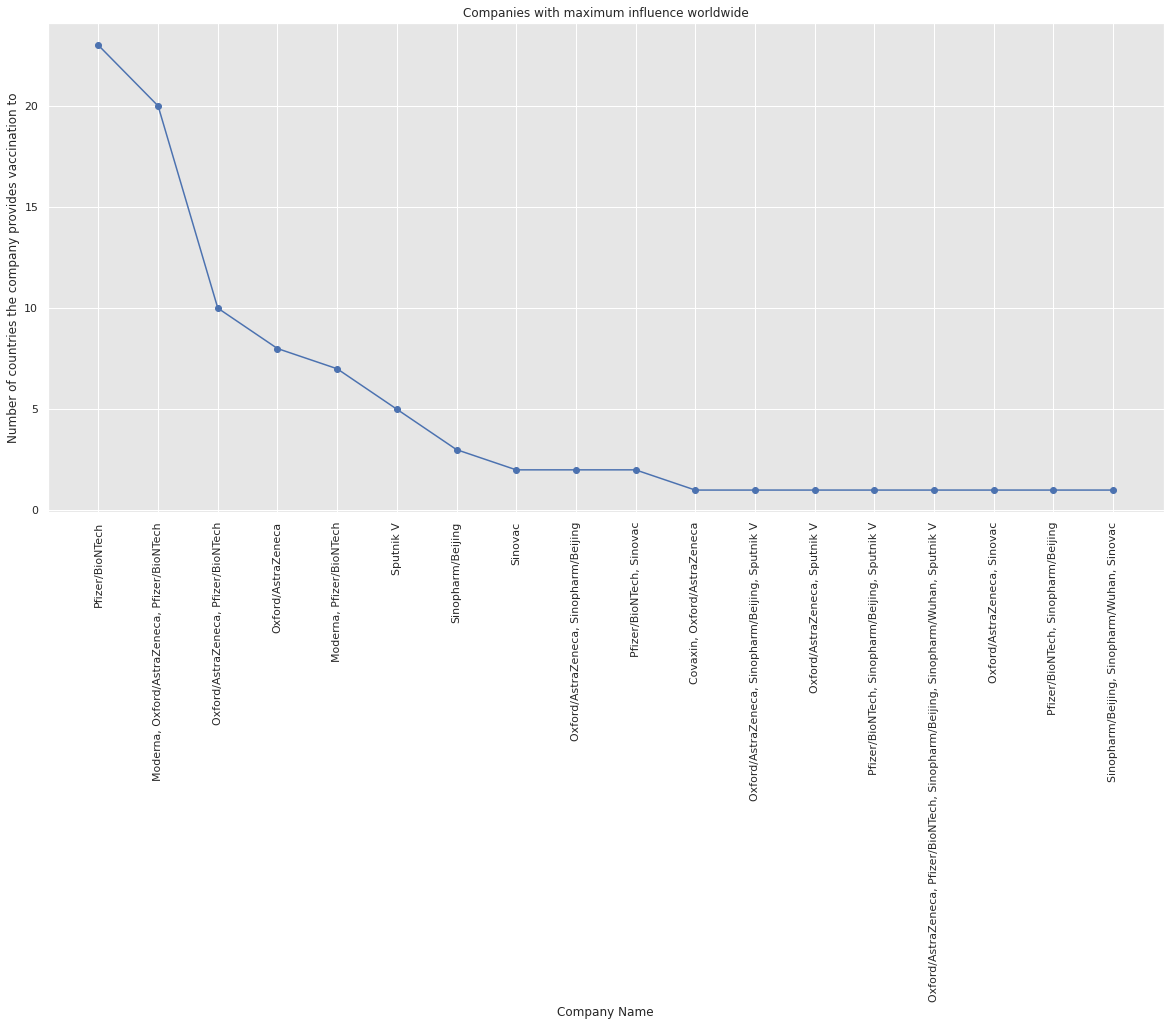

In [138]:
vaccines_per_company_count = covid_world.groupby(by=covid_world.columns, axis=1).sum()
new_covid_world = covid_world.drop(columns=['country'],axis=1)
vaccines_per_country_count = new_covid_world.groupby('country')['vaccines'].apply(frozenset).reset_index()
val = vaccines_per_country_count['vaccines'].value_counts()
vaccines_per_country_count = vaccines_per_country_count['vaccines'].value_counts().sort_values()
val1 = pd.DataFrame(list(val), columns=['vaccine'])
sets = val.index
new_list = ([list(x) for x in sets])
df = pd.DataFrame(new_list,
                  columns=['company_name'])
val1['company_name'] =df


plt.figure(figsize=(20,9))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title('Companies with maximum influence worldwide')
plt.ylabel('Number of countries the company provides vaccination to')
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.plot(val1.company_name,val1.vaccine,marker='o')

Let us save and upload our work to Jovian before continuing

In [97]:
import jovian

In [98]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project


'https://jovian.ai/vrajesh1/course-project'

## Asking and Answering Questions



#### **Q1**: Top 10 countries with the access to the vaccination

Here, we get the sum of the covid vaccination doses provided in each country and get the top 10 countries where maximum doses were delivered till the date.

In [99]:
top_access_countries = covid_world.groupby(covid_world.index).daily_vaccinations.sum().sort_values(ascending = False).head(10)

In [100]:
top_access_countries

country
United States           46807045.0
China                   34922496.0
United Kingdom          14715317.0
England                 12488524.0
India                    8241026.0
Israel                   6306012.0
Brazil                   4690767.0
United Arab Emirates     4152403.0
Turkey                   4091063.0
Germany                  3882758.0
Name: daily_vaccinations, dtype: float64

#### **Q2**: Increase in daily vaccination count in top 10 countries with max vaccination count 

We firstly use the data distribute the data grouped by country into a lists of dataframes and then we calculate the sum and distribute our data according. As a result we get rate of increase in covid doses for the countries with maximum doses distributed. 

In [101]:
import numpy as np 

def get_variation(df,feature,countries):
  data = []
  for country in countries:
    datafile = df.loc[df.country == country]
    trace = [datafile['date'],datafile[feature]]
    data.append(trace)
  return data

In [102]:
country_names = covid_world['country'].unique().tolist()
result_variations = get_variation(covid_world,'daily_vaccinations',country_names)

In [103]:
result_variations

[[country
  Albania    2021-01-10
  Albania    2021-01-11
  Albania    2021-01-12
  Albania    2021-01-13
  Albania    2021-01-14
  Albania    2021-01-15
  Albania    2021-01-16
  Albania    2021-01-17
  Albania    2021-01-18
  Albania    2021-01-19
  Albania    2021-01-20
  Albania    2021-01-21
  Albania    2021-01-22
  Albania    2021-01-23
  Albania    2021-01-24
  Albania    2021-01-25
  Albania    2021-01-26
  Albania    2021-01-27
  Albania    2021-01-28
  Albania    2021-01-29
  Albania    2021-01-30
  Albania    2021-01-31
  Albania    2021-02-01
  Albania    2021-02-02
  Albania    2021-02-03
  Albania    2021-02-04
  Albania    2021-02-05
  Albania    2021-02-06
  Albania    2021-02-07
  Albania    2021-02-08
  Albania    2021-02-09
  Name: date, dtype: object, country
  Albania     NaN
  Albania    64.0
  Albania    64.0
  Albania    63.0
  Albania    66.0
  Albania    62.0
  Albania    62.0
  Albania    58.0
  Albania    55.0
  Albania    51.0
  Albania    47.0
  Albania  

In [104]:
result_variations[0]

[country
 Albania    2021-01-10
 Albania    2021-01-11
 Albania    2021-01-12
 Albania    2021-01-13
 Albania    2021-01-14
 Albania    2021-01-15
 Albania    2021-01-16
 Albania    2021-01-17
 Albania    2021-01-18
 Albania    2021-01-19
 Albania    2021-01-20
 Albania    2021-01-21
 Albania    2021-01-22
 Albania    2021-01-23
 Albania    2021-01-24
 Albania    2021-01-25
 Albania    2021-01-26
 Albania    2021-01-27
 Albania    2021-01-28
 Albania    2021-01-29
 Albania    2021-01-30
 Albania    2021-01-31
 Albania    2021-02-01
 Albania    2021-02-02
 Albania    2021-02-03
 Albania    2021-02-04
 Albania    2021-02-05
 Albania    2021-02-06
 Albania    2021-02-07
 Albania    2021-02-08
 Albania    2021-02-09
 Name: date, dtype: object, country
 Albania     NaN
 Albania    64.0
 Albania    64.0
 Albania    63.0
 Albania    66.0
 Albania    62.0
 Albania    62.0
 Albania    58.0
 Albania    55.0
 Albania    51.0
 Albania    47.0
 Albania    40.0
 Albania    34.0
 Albania    26.0
 Alb

#### **Q3**: Countries with highest mean vaccination per million on daily basis

To acheive our goal we group our data by country and then sort the mean of daily vaccinations per million. As a result we get the countries that are fastest in distributing the vaccines compared to the population of the country. 

In [105]:
mean_vacc_per_mill = covid_world.groupby(covid_world.index).mean().sort_values(by='daily_vaccinations_per_million',ascending=False)

In [106]:
mean_vacc_per_mill

,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,
Gibraltar,1.306674e+04,1.062591e+04,715.218750,733.142857,38.783824,31.540000,21760.914286
Seychelles,2.680986e+04,2.450741e+04,2480.000000,1417.200000,27.262273,24.920455,14411.257143
Israel,3.013242e+06,2.139251e+06,113788.637931,108724.344828,34.813220,24.716102,12561.172414
United Arab Emirates,2.803736e+06,8.365680e+05,106383.571429,101278.121951,28.348205,8.460000,10239.975610
Anguilla,6.705000e+02,6.705000e+02,NaN,149.000000,4.470000,4.470000,9932.000000
...,...,...,...,...,...,...,...
Pakistan,1.361400e+04,1.361400e+04,NaN,3404.000000,0.005000,0.005000,15.000000
Egypt,6.575000e+02,NaN,NaN,219.000000,0.000000,NaN,2.000000
Algeria,1.500000e+01,NaN,30.000000,30.000000,0.000000,NaN,1.000000


#### **Q4**: Top 20 days with most doses provided worldwide 

We find out the days most doses were delivered worldwide by grouping our data by date and obtaining to sum of daily vaccinations.

In [107]:
covid_inc = covid_world.groupby('date').daily_vaccinations.sum().sort_values()

In [108]:
doses_inc = covid_inc.tail(20)

In [109]:
doses_inc

date
2021-01-26    4369131.0
2021-02-11    4450435.0
2021-02-10    4546070.0
2021-01-27    4557233.0
2021-01-28    4597119.0
2021-01-31    4604339.0
2021-01-29    4635054.0
2021-01-30    4643306.0
2021-02-12    4714945.0
2021-02-14    4769998.0
2021-02-13    4793876.0
2021-02-01    4832641.0
2021-02-02    5008819.0
2021-02-03    5237487.0
2021-02-04    5489340.0
2021-02-05    5603148.0
2021-02-06    5850766.0
2021-02-08    6037724.0
2021-02-09    6043927.0
2021-02-07    6092876.0
Name: daily_vaccinations, dtype: float64

#### **Q5**: Maximum vaccination provided by companies and the companies facilitating most countries to fight this global battle 

Firstly, we group our data by vaccines and calculate sum of daily_vaccinations. As a result we get the sum of vaccines provided by each compnay. Moreover, we find the companies delivering the doses to each countries listed below and then we count the total countries each company delivers doses to. Thereby we obtain the top companies facilitating most of the countries to help fight this battle.

In [110]:
vaccines_per_company = covid_world.groupby('vaccines').sum()

In [111]:
vaccines_per_company_total = vaccines_per_company.sort_values(by='daily_vaccinations', ascending=False)

In [112]:
vaccines_per_company_count = covid_world.groupby(by=covid_world.columns, axis=1).sum()

In [113]:
vaccines_per_company_count

,country,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_raw,date,iso_code,people_vaccinated,people_vaccinated_per_hundred,source_name,source_website,total_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,,,,,,,
Albania,Albania,0.0,0.0,0.0,2021-01-10,ALB,0.0,0.00,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,0.0,0.00,Pfizer/BioNTech
Albania,Albania,64.0,22.0,0.0,2021-01-11,ALB,0.0,0.00,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,0.0,0.00,Pfizer/BioNTech
Albania,Albania,64.0,22.0,0.0,2021-01-12,ALB,128.0,0.00,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,128.0,0.00,Pfizer/BioNTech
Albania,Albania,63.0,22.0,60.0,2021-01-13,ALB,188.0,0.01,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,188.0,0.01,Pfizer/BioNTech
Albania,Albania,66.0,23.0,78.0,2021-01-14,ALB,266.0,0.01,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,266.0,0.01,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wales,Wales,28015.0,8886.0,28786.0,2021-02-10,0,684097.0,21.70,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,687892.0,21.82,"Oxford/AstraZeneca, Pfizer/BioNTech"
Wales,Wales,27897.0,8848.0,32062.0,2021-02-11,0,715944.0,22.71,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,719954.0,22.83,"Oxford/AstraZeneca, Pfizer/BioNTech"
Wales,Wales,27743.0,8799.0,33715.0,2021-02-12,0,749445.0,23.77,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,753669.0,23.90,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [114]:
new_covid_world = covid_world.drop(columns=['country'],axis=1)

In [115]:
vaccines_per_country_count = new_covid_world.groupby('country')['vaccines'].apply(frozenset).reset_index()

In [116]:
val = vaccines_per_country_count['vaccines'].value_counts()

In [117]:
vaccines_per_country_count = vaccines_per_country_count['vaccines'].value_counts().sort_values()

In [118]:
val1 = pd.DataFrame(list(val), columns=['vaccine'])

In [119]:
sets = val.index
new_list = ([list(x) for x in sets])
df = pd.DataFrame(new_list,
                  columns=['company_name'])

In [120]:
val1['company_name'] =df

In [121]:
val1

,vaccine,company_name
0,23,Pfizer/BioNTech
1,20,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2,10,"Oxford/AstraZeneca, Pfizer/BioNTech"
3,8,Oxford/AstraZeneca
4,7,"Moderna, Pfizer/BioNTech"
5,5,Sputnik V
6,3,Sinopharm/Beijing
7,2,Sinovac
8,2,"Oxford/AstraZeneca, Sinopharm/Beijing"
9,2,"Pfizer/BioNTech, Sinovac"


Let us save and upload our work to Jovian before continuing.

In [122]:
import jovian

In [123]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project


'https://jovian.ai/vrajesh1/course-project'

## Inferences and Conclusion

Analyzing the data set of Covid 19 vaccination provided worldwide we did a thorough analysis of the speed of vaccinations availability worldwide. It is clearly visible that United States had the highest number of doses distributed but when it comes to the ratio of number of doses vs the population we can observe that United States is not in the lead. Analyzing the number of doses delivered by different companies we can say Pfizer and BioNTech togather are supporting over 40 countries by providing over 50 million vaccinations doses worldwide. The data set can be improved if we can find the number of increase in the production rate of vaccination. But we have sufficient data to form a linear regression model to predict the future trend of doses avaibility. 

In [124]:
import jovian

In [141]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project


'https://jovian.ai/vrajesh1/course-project'

## References and Future Work

Dataset https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Other helpful sources
  Stack Overflow  
  https://stackoverflow.com/questions/36392735/how-to-combine-multiple-rows-into-a-single-row-with-pandas  
  https://www.kaggle.com/mrinalchandramishra/predicting-vaccination-done-in-future 
  
  https://www.kaggle.com/gpreda/covid-19-vaccination-progress

In [126]:
import jovian

In [127]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project


'https://jovian.ai/vrajesh1/course-project'

In [142]:
jovian.submit(assignment="zero-to-pandas-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/course-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
